In [227]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "overfit"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [228]:
import pandas as pd

def load_data(data_path = "datasets"):
    csv_path_train = os.path.join(data_path, "train.csv")
    csv_path_test = os.path.join(data_path, "test.csv")
    csv_path_sample_submission = os.path.join(data_path, "sample_submission.csv")
    return pd.read_csv(csv_path_train), pd.read_csv(csv_path_test), pd.read_csv(csv_path_sample_submission)

In [241]:
train_data, test_data, sample_submission_data = load_data()

In [230]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Columns: 301 entries, id to 299
dtypes: float64(300), int64(1)
memory usage: 45.4 MB


In [231]:
train_data[:3]

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211


In [232]:
test_data[:3]

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463


In [7]:
train_data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


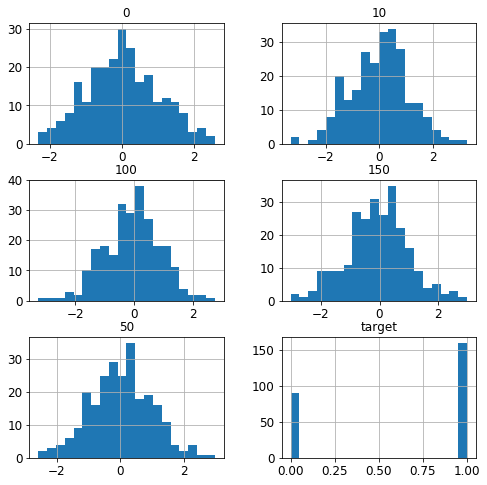

In [8]:
train_data[["target","0","10","50","100","150"]].hist(bins=20,figsize=(8,8))
plt.show()

In [9]:
corr_matrix = train_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
164       0.124151
101       0.118379
272       0.113909
226       0.113660
17        0.110998
105       0.110589
0         0.108966
244       0.108147
13        0.107828
176       0.099790
89        0.099526
214       0.097068
240       0.096668
119       0.092622
221       0.091455
215       0.090960
246       0.088314
285       0.087762
193       0.086302
253       0.084235
            ...   
4        -0.114726
276      -0.117467
239      -0.118166
43       -0.121413
252      -0.122335
209      -0.127391
63       -0.127440
82       -0.128248
150      -0.130454
237      -0.133168
134      -0.133731
220      -0.134738
298      -0.134760
90       -0.136230
230      -0.136263
258      -0.138332
133      -0.139100
129      -0.139439
165      -0.142526
39       -0.142915
16       -0.144267
194      -0.

## Prepare the data

In [379]:
def drop_features(X, feature_list):
        X_drop = X.drop(feature_list, axis =1)
        return X_drop

In [380]:
train_set = drop_features(train_data, ["id","target"])
target_set = train_data["target"]
test_set = drop_features(test_data, ["id"])
train_set[:3]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211


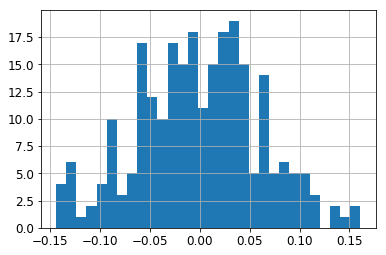

In [12]:
(train_set.mean(axis = 1)).hist(bins=30)

In [381]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


prepare_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

X_train = prepare_pipeline.fit_transform(train_set)
y_train = np.array(train_data["target"])
X_test = prepare_pipeline.fit_transform(test_set)

In [382]:
X_train[:3,:5]

array([[-0.12173567,  2.17600225,  0.5036917 , -0.60997161,  1.26523203],
       [ 1.06157697, -0.93927777, -0.53978988,  0.32097431, -0.41572855],
       [-0.54829027, -0.06167818, -0.50546483,  0.1446888 , -0.022827  ]])

In [15]:
y_train[:3]

array([1., 0., 1.])

In [383]:
print(X_train.shape, y_train.shape, X_test.shape)

(250, 300) (250,) (19750, 300)


## CV score evaluation

In [348]:
from sklearn.model_selection import cross_val_score

n_cv = 6

def CV_scores(clf, X, y, cv=n_cv):
    scores = cross_val_score(clf, X, y, cv=cv, scoring= 'accuracy')
    scores_mean = np.mean(scores)
    scores_dev = np.std(scores)
    return scores_mean, scores_dev

def CV_scores_auc(clf, X, y, cv=n_cv):
    scores = cross_val_score(clf, X, y, cv=cv, scoring= 'roc_auc')
    scores_mean = np.mean(scores)
    scores_dev = np.std(scores)
    return scores_mean, scores_dev

## Learning curves

In [279]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

## Model selection

### SVM classifier

In [344]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

poly_kernel_svm_clf = SVC(kernel="poly", coef0 = 1, gamma="auto")

param_grid = [
    {'degree': [1,2,3,4], 'C': [0.1,10,100]},
]

grid_search_svm = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=5, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_svm.fit(X_train,y_train)
best_svm_clf = grid_search_svm.best_estimator_
best_svm_clf

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [353]:
scores_mean, scores_dev = CV_scores(best_svm_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_svm_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7179271708683473 
CV scores std dev:  0.05473091173078954
CV auc scores mean:     0.7527448397013615 
CV auc scores std dev:  0.06600165544696221


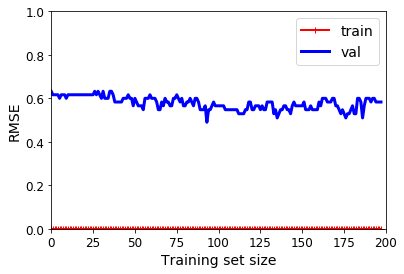

In [189]:
plot_learning_curves(best_svm_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

### DecisionTree

In [384]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [10,20], 'max_leaf_nodes': [10,20,50]},
]

grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_tree.fit(X_train,y_train)
best_tree_clf = grid_search_tree.best_estimator_
best_tree_clf

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [385]:
scores_mean, scores_dev = CV_scores(best_tree_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_tree_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6200154858691445 
CV scores std dev:  0.06034709784018812
CV auc scores mean:     0.5895932257043368 
CV auc scores std dev:  0.06766766852121478


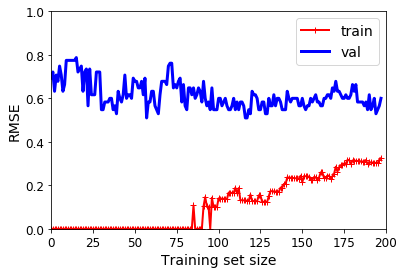

In [192]:
plot_learning_curves(best_tree_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

### RandomForest classifier

In [386]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50,100,200], 'max_features': [10,50,100]},
]

grid_search_forest = GridSearchCV(forest_clf, param_grid, cv=5, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_forest.fit(X_train,y_train)
best_forest_clf = grid_search_forest.best_estimator_
best_forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [387]:
scores_mean, scores_dev = CV_scores(best_forest_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_forest_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6519550909794812 
CV scores std dev:  0.03622512307071123
CV auc scores mean:     0.7440408357075023 
CV auc scores std dev:  0.039449419777733405


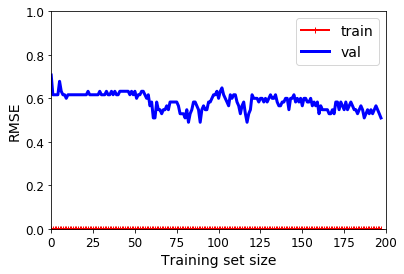

In [195]:
plot_learning_curves(best_forest_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

So far: massive overfit !!!

### SVM with RBF

In [388]:
from sklearn.svm import SVC

rbf_clf = SVC(kernel="rbf", gamma= 5, C=0.1)

In [389]:
scores_mean, scores_dev = CV_scores(rbf_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(rbf_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6399535423925669 
CV scores std dev:  0.004106311156716323
CV auc scores mean:     0.5 
CV auc scores std dev:  0.0


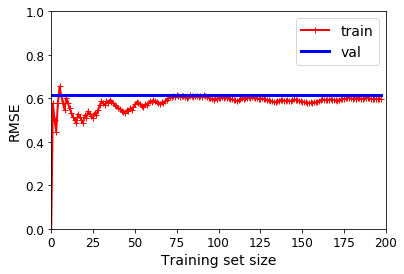

In [32]:
plot_learning_curves(rbf_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

Underfiting !

### Logistic Regression

In [390]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', C=1)

In [391]:
scores_mean, scores_dev = CV_scores(log_reg, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6803135888501742 
CV scores std dev:  0.05106898634000976
CV auc scores mean:     0.7694681861348528 
CV auc scores std dev:  0.0778297611821366


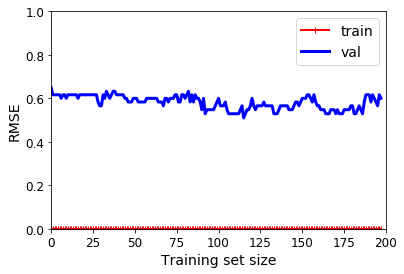

In [179]:
plot_learning_curves(log_reg, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

In [392]:
log_reg_2 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

In [393]:
scores_mean, scores_dev = CV_scores(log_reg_2, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_2, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7520325203252032 
CV scores std dev:  0.029301918261423605
CV auc scores mean:     0.8016619183285849 
CV auc scores std dev:  0.03891195699896827


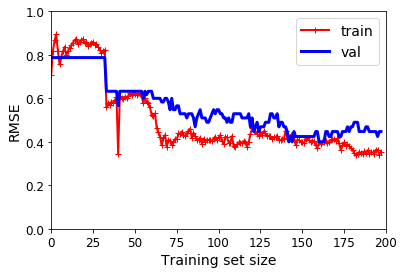

In [287]:
plot_learning_curves(log_reg_2, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

In [394]:
log_reg_4 = LogisticRegression(penalty='l1', C=0.12, solver='saga', warm_start=True)

scores_mean, scores_dev = CV_scores(log_reg_4, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_4, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7320944638017809 
CV scores std dev:  0.03696237646172995
CV auc scores mean:     0.8118708452041784 
CV auc scores std dev:  0.03769574386970627


### ExtraTrees

In [395]:
from sklearn.ensemble import ExtraTreesClassifier

forest_clf = ExtraTreesClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5,10], 'max_depth': [5,10,20], 'max_leaf_nodes': [10,20,50]},
]

grid_search_extra_forest = GridSearchCV(forest_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_extra_forest.fit(X_train,y_train)
extra_trees_clf = grid_search_extra_forest.best_estimator_
extra_trees_clf

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=10,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [396]:
scores_mean, scores_dev = CV_scores(extra_trees_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(extra_trees_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6357917150600078 
CV scores std dev:  0.02446942667822949
CV auc scores mean:     0.6234647040202596 
CV auc scores std dev:  0.040366854450150744


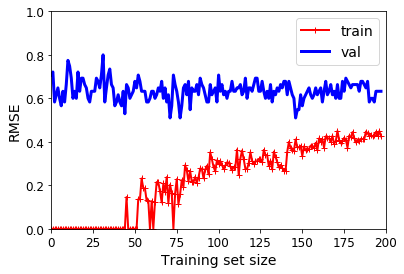

In [397]:
plot_learning_curves(extra_trees_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

## Selecting features

Ordering features by squared correlation with target (to eliminate sign)

In [398]:
corr_matrix = train_data.drop("id", axis=1).corr()
corr_with_target = corr_matrix["target"]
corr_with_target_squared = np.power(corr_with_target, 2)
corr_with_target_squared = corr_with_target_squared.sort_values(ascending=False)
corr_with_target_squared.head()

target    1.000000
33        0.139583
65        0.086346
217       0.042938
117       0.039005
Name: target, dtype: float64

In [399]:
list_features = corr_with_target_squared.keys()[1:]

In [400]:
list_features

Index(['33', '65', '217', '117', '91', '24', '295', '73', '183', '80',
       ...
       '40', '191', '207', '136', '74', '20', '224', '172', '195', '75'],
      dtype='object', length=300)

In [401]:
n_features = 3
train_set_reduced = train_set[list_features[:n_features]]
test_set_reduced = test_set[list_features[:n_features]]

In [402]:
train_set_reduced.head()

,33,65,217
0,0.385,-0.770,1.187
1,-2.721,1.221,0.216
2,0.924,0.943,0.269
3,0.394,-0.706,0.066
4,0.037,0.357,0.110


In [403]:
test_set_reduced.head()

,33,65,217
0,1.988,-1.010,-0.904
1,0.543,-0.781,0.953
2,-1.191,-0.529,-1.201
3,0.542,0.754,1.502
4,0.635,-1.210,0.460


In [404]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


prepare_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

X_train_red = prepare_pipeline.fit_transform(train_set_reduced)
y_train = np.array(train_data["target"])
X_test_red = prepare_pipeline.fit_transform(test_set_reduced)

In [405]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,5,8], 'max_depth': [10,20], 'max_leaf_nodes': [10,20,50]},
]

grid_search_forest_2 = GridSearchCV(forest_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_forest_2.fit(X_train_red,y_train)
best_forest_clf_2 = grid_search_forest_2.best_estimator_
best_forest_clf_2

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [406]:
scores_mean, scores_dev = CV_scores(best_forest_clf_2, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_forest_clf_2, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.708091366627952 
CV scores std dev:  0.024614282384408454
CV auc scores mean:     0.7311174422285532 
CV auc scores std dev:  0.028632933601372184


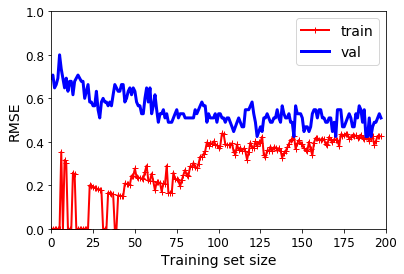

In [407]:
plot_learning_curves(best_forest_clf_2, X_train_red, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

In [408]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

poly_kernel_svm_clf = SVC(kernel="poly", coef0 = 1)

param_grid = [
    {'degree': [1,2,3], 'C': [0.1,1,10], 'gamma': [0.03,0.1,0.3]},
]

grid_search_svm_2 = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_svm_2.fit(X_train_red,y_train)
best_svm_clf_2 = grid_search_svm_2.best_estimator_
best_svm_clf_2

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=0.3, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [409]:
scores_mean, scores_dev = CV_scores(best_svm_clf_2, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_svm_clf_2, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7763259775454897 
CV scores std dev:  0.045655109996833185
CV auc scores mean:     0.8114909781576447 
CV auc scores std dev:  0.05101262275009852


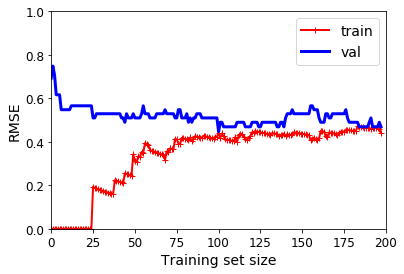

In [410]:
plot_learning_curves(best_svm_clf_2, X_train_red, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

### Sequential feature selection

In [411]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [413]:
log_reg_clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

sfs1 = SFS(log_reg_clf, k_features=15, forward=True, floating=False, verbose=0, 
           scoring='roc_auc', cv=6, n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

In [414]:
top_features = list(sfs1.k_feature_names_)
top_features

['0',
 '1',
 '2',
 '3',
 '16',
 '33',
 '45',
 '65',
 '73',
 '91',
 '101',
 '117',
 '199',
 '217',
 '295']

In [415]:
X_train_sfs = prepare_pipeline.fit_transform(train_set[top_features])

In [417]:
scores_mean, scores_dev = CV_scores(log_reg_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7520325203252032 
CV scores std dev:  0.029301918261423605
CV auc scores mean:     0.8016619183285849 
CV auc scores std dev:  0.03891195699896827


## Dimensionnality reduction

In [311]:
from sklearn.decomposition import PCA

In [418]:
pca = PCA()

pca.fit(X_train)
pca.explained_variance_ratio_[:10]

array([0.01415622, 0.01393714, 0.01348502, 0.01315009, 0.01307046,
       0.0126725 , 0.01243153, 0.01227743, 0.01211999, 0.01181826])

In [419]:
len(pca.explained_variance_ratio_)  # the number of components is capped by the number of training instances.

250

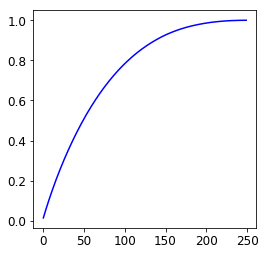

In [420]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (4,4))
plt.plot(range(len(cum_sum)), cum_sum, "b-")
plt.show()

In [421]:
pca = PCA(n_components = 0.9) # keeps 90 percent variance

X_train_red = pca.fit_transform(X_train)

In [422]:
X_train_red.shape

(250, 139)

In [425]:
scores_mean, scores_dev = CV_scores(best_tree_clf, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_tree_clf, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.5963995354239258 
CV scores std dev:  0.05809716837892613
CV auc scores mean:     0.5120528648306426 
CV auc scores std dev:  0.11695998312993561


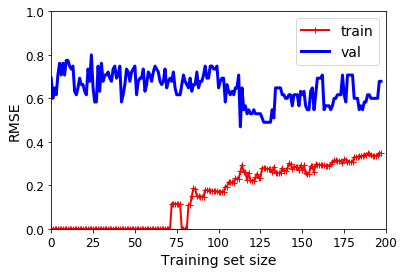

In [426]:
plot_learning_curves(best_tree_clf, X_train_red, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

In [427]:
log_reg_3 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

In [428]:
scores_mean, scores_dev = CV_scores(log_reg_3, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_3, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6685056136275648 
CV scores std dev:  0.07135489424053444
CV auc scores mean:     0.7019468186134853 
CV auc scores std dev:  0.07234015278623121


In [429]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=20, n_neighbors=10)
X_lle_train = lle.fit_transform(X_train)

In [437]:
scores_mean, scores_dev = CV_scores(best_tree_clf, X_lle_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_tree_clf, X_lle_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6637630662020906 
CV scores std dev:  0.05476244873525327
CV auc scores mean:     0.5864751503640393 
CV auc scores std dev:  0.0709445484330997


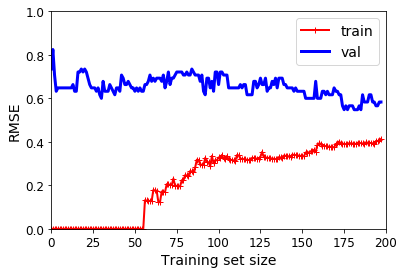

In [438]:
plot_learning_curves(best_tree_clf, X_lle_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

## Stacking models

In [308]:
import lightgbm

ModuleNotFoundError: No module named 'lightgbm'

In [326]:
# Define level 1 classifiers

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


RANDOM_SEED = 16

#lgbm = LGBMClassifier(objective='binary', boosting_type='gbdt', n_estimators=1000, 
#                      metric='auc', learning_rate=0.009, num_leaves=8, feature_fraction=0.5,
#                      bagging_fraction=0.5, bagging_freq=1, max_depth=3, reg_alpha=0.75,
#                      reg_lambda=0.75)
rf = RandomForestClassifier(n_estimators=500, random_state=RANDOM_SEED)
nb = GaussianNB()
svc = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
knn = KNeighborsClassifier(n_neighbors=63)
sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001, alpha=0.01, l1_ratio=1.0, 
                    learning_rate='adaptive', loss='log', penalty='elasticnet')

In [327]:
# Define level 2 classifier and stacking

from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier

np.random.seed(RANDOM_SEED)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingCVClassifier(classifiers=[knn, rf, nb, sgd], 
                            use_probas=True,
                            use_features_in_secondary=True,
                            meta_classifier=lr,
                            cv=6)

In [329]:
# Set up K-Fold cross validation and predictions
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

num_folds = 6
folds = KFold(n_splits=num_folds, random_state=16)

test_result = np.zeros(len(test_set))
auc_score = 0
accur_score = 0

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_set, target_set)):
    print("Fold: ", fold_ + 1)
    
    X_train, y_train = train_set.iloc[trn_idx], target_set.iloc[trn_idx]
    X_valid, y_valid = train_set.iloc[val_idx], target_set.iloc[val_idx]
    
    sclf.fit(X_train.values, y_train.values)
    
    y_proba = sclf.predict_proba(X_valid)
    auc = roc_auc_score(y_valid, y_proba[:, 1])
    print(auc)
    auc_score += auc
    
    y_pred = (y_proba >= 0.5)*1
    accur = accuracy_score(y_valid, y_pred[:, 1])
    print(accur)
    accur_score += accur

    preds = sclf.predict_proba(test_set)
    test_result += preds[:, 1]

# print the average AUC and Accuracy across the folds and compute the final results on the test data
auc_score = auc_score / folds.n_splits
accur_score = accur_score / folds.n_splits
print("AUC score:      ", auc_score)
print("Accuracy score: ", accur_score)
test_result = test_result / folds.n_splits

Fold:  1
0.8775510204081634
0.6666666666666666
Fold:  2
0.7176470588235295
0.6904761904761905
Fold:  3
0.923469387755102
0.8095238095238095
Fold:  4
0.8245192307692308
0.7619047619047619
Fold:  5
0.8284313725490197
0.6829268292682927
Fold:  6
0.861244019138756
0.8048780487804879
AUC score:       0.8388103482406336
Accuracy score:  0.736062717770035


In [332]:
y_pred_stacking = (test_result >= 0.5)*1

In [333]:
df_stacking = pd.DataFrame({'id': ids, 'target': y_pred_stacking})  

In [334]:
df_stacking[['id', 'target']].to_csv('submission_stacking.csv', index=False) 

## Bayesian model

In [447]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [448]:
from sklearn.model_selection import train_test_split

np.random.seed(11)
perm = np.random.permutation(len(X_train))
X_tr, X_val, y_tr, y_val = train_test_split(X_train[perm], y_train[perm], test_size = 0.2)

In [449]:
print(X_tr.shape, y_tr.shape, X_val.shape, y_val.shape)

(200, 300) (200,) (50, 300) (50,)


In [450]:
n_tr, n_feat = X_tr.shape

In [451]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

In [452]:
from sklearn.metrics import log_loss

def objective(w):
    """Objective function to minimize"""
    w_array = np.array(w)
    w_true, b = (w_array[1:], w_array[0])
    y = sigmoid(np.matmul(X_tr, w_true) + b)
    loss = np.mean(log_loss(y_tr,y))
    return loss

In [453]:
w0 = np.random.uniform(-1, 1, n_feat+1)
print(w0[:5])
objective(w0)

[-0.43634009  0.87997844  0.92118734  0.40132281  0.91047008]


3.8947104244430157

In [467]:
from hyperopt import hp

# Create the domain space

space = [hp.normal('bias', mu=0, sigma = 3)] + [hp.normal(str(dim), mu=0, sigma=0.3) for dim in range(n_feat)]

#space = [hp.uniform(str(dim), -3, 3) for dim in range(n_feat)]

In [468]:
from hyperopt.pyll.stochastic import sample

sample(space)[:5]

(5.187173806183111,
 -0.37410884005324047,
 0.5993806916493062,
 0.3592773638258839,
 -0.31913682793306947)

In [469]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

from hyperopt import fmin

# Run max_evals evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=200, rstate= np.random.RandomState(50))

# Run max_evals evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

  0%|          | 0/200 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.098315 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  0%|          | 1/200 [00:00<00:37,  5.33it/s, best loss: 2.492700651079813]

INFO:hyperopt.tpe:tpe_transform took 0.096563 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.492701


  1%|          | 2/200 [00:00<00:36,  5.42it/s, best loss: 2.2198820916933477]

INFO:hyperopt.tpe:tpe_transform took 0.093975 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.219882


  2%|▏         | 3/200 [00:00<00:37,  5.32it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.249749 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.901483


  2%|▏         | 4/200 [00:00<00:44,  4.43it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.111690 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.901483


  2%|▎         | 5/200 [00:01<00:42,  4.54it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.100274 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.901483


  3%|▎         | 6/200 [00:01<00:39,  4.88it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.254327 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.901483


  4%|▎         | 7/200 [00:01<00:46,  4.15it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.097733 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.901483


  4%|▍         | 8/200 [00:01<00:43,  4.43it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.100462 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.901483


  4%|▍         | 9/200 [00:01<00:40,  4.72it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.110249 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.901483


  5%|▌         | 10/200 [00:02<00:43,  4.39it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.359944 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss 1.901483


  6%|▌         | 11/200 [00:02<00:55,  3.42it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.106558 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss 1.901483


  6%|▌         | 12/200 [00:02<00:48,  3.92it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.101461 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss 1.901483


  6%|▋         | 13/200 [00:02<00:42,  4.44it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.259600 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss 1.901483


  7%|▋         | 14/200 [00:03<00:48,  3.85it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.096973 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss 1.901483


  8%|▊         | 15/200 [00:03<00:43,  4.23it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.100151 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss 1.901483


  8%|▊         | 16/200 [00:03<00:39,  4.62it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.177981 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss 1.901483


  8%|▊         | 17/200 [00:03<00:44,  4.08it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.558897 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss 1.901483


  9%|▉         | 18/200 [00:04<01:06,  2.75it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.118406 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss 1.901483


 10%|▉         | 19/200 [00:04<00:58,  3.08it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.150843 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss 1.901483


 10%|█         | 20/200 [00:05<00:55,  3.22it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.117419 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss 1.901483


 10%|█         | 21/200 [00:05<01:08,  2.59it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.478164 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss 1.901483


 11%|█         | 22/200 [00:06<01:39,  1.78it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.142246 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss 1.901483


 12%|█▏        | 23/200 [00:07<01:43,  1.70it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.114552 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss 1.901483


 12%|█▏        | 24/200 [00:07<01:34,  1.86it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.252882 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss 1.901483


 12%|█▎        | 25/200 [00:08<01:35,  1.83it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.091855 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss 1.901483


 13%|█▎        | 26/200 [00:08<01:32,  1.88it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.087510 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss 1.901483


 14%|█▎        | 27/200 [00:09<01:24,  2.04it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.088232 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss 1.901483


 14%|█▍        | 28/200 [00:09<01:27,  1.96it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.101697 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss 1.901483


 14%|█▍        | 29/200 [00:10<01:23,  2.04it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.088662 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss 1.901483


 15%|█▌        | 30/200 [00:10<01:19,  2.13it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.079922 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss 1.901483


 16%|█▌        | 31/200 [00:11<01:16,  2.22it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.236070 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss 1.901483


 16%|█▌        | 32/200 [00:11<01:20,  2.09it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.073732 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss 1.901483


 16%|█▋        | 33/200 [00:11<01:16,  2.17it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.108446 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss 1.901483


 17%|█▋        | 34/200 [00:12<01:16,  2.18it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.237266 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss 1.901483


 18%|█▊        | 35/200 [00:12<01:20,  2.06it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.100656 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss 1.901483


 18%|█▊        | 36/200 [00:13<01:16,  2.14it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.080513 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss 1.901483


 18%|█▊        | 37/200 [00:13<01:13,  2.22it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.243364 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss 1.901483


 19%|█▉        | 38/200 [00:14<01:20,  2.02it/s, best loss: 1.9014831665677112]

INFO:hyperopt.tpe:tpe_transform took 0.088066 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss 1.901483


 20%|█▉        | 39/200 [00:14<01:15,  2.12it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.085908 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss 1.895941


 20%|██        | 40/200 [00:15<01:12,  2.20it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.078371 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss 1.895941


 20%|██        | 41/200 [00:15<01:17,  2.06it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.089263 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss 1.895941


 21%|██        | 42/200 [00:16<01:13,  2.15it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.079115 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss 1.895941


 22%|██▏       | 43/200 [00:16<01:10,  2.23it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.080274 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss 1.895941


 22%|██▏       | 44/200 [00:17<01:08,  2.28it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.228373 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss 1.895941


 22%|██▎       | 45/200 [00:17<01:13,  2.12it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.075115 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss 1.895941


 23%|██▎       | 46/200 [00:18<01:10,  2.19it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.076289 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss 1.895941


 24%|██▎       | 47/200 [00:18<01:07,  2.26it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.238381 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss 1.895941


 24%|██▍       | 48/200 [00:18<01:12,  2.10it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.081653 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss 1.895941


 24%|██▍       | 49/200 [00:19<01:09,  2.16it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.078355 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss 1.895941


 25%|██▌       | 50/200 [00:19<01:07,  2.22it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.236828 seconds
INFO:hyperopt.tpe:TPE using 50/50 trials with best loss 1.895941


 26%|██▌       | 51/200 [00:20<01:11,  2.08it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.090101 seconds
INFO:hyperopt.tpe:TPE using 51/51 trials with best loss 1.895941


 26%|██▌       | 52/200 [00:20<01:08,  2.15it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.090568 seconds
INFO:hyperopt.tpe:TPE using 52/52 trials with best loss 1.895941


 26%|██▋       | 53/200 [00:21<01:07,  2.19it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.093353 seconds
INFO:hyperopt.tpe:TPE using 53/53 trials with best loss 1.895941


 27%|██▋       | 54/200 [00:21<01:13,  1.99it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.108524 seconds
INFO:hyperopt.tpe:TPE using 54/54 trials with best loss 1.895941


 28%|██▊       | 55/200 [00:22<01:10,  2.05it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.098923 seconds
INFO:hyperopt.tpe:TPE using 55/55 trials with best loss 1.895941


 28%|██▊       | 56/200 [00:22<01:09,  2.06it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.087347 seconds
INFO:hyperopt.tpe:TPE using 56/56 trials with best loss 1.895941


 28%|██▊       | 57/200 [00:23<01:06,  2.15it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.233276 seconds
INFO:hyperopt.tpe:TPE using 57/57 trials with best loss 1.895941


 29%|██▉       | 58/200 [00:23<01:09,  2.03it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.084171 seconds
INFO:hyperopt.tpe:TPE using 58/58 trials with best loss 1.895941


 30%|██▉       | 59/200 [00:24<01:06,  2.12it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.090531 seconds
INFO:hyperopt.tpe:TPE using 59/59 trials with best loss 1.895941


 30%|███       | 60/200 [00:24<01:04,  2.16it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.244296 seconds
INFO:hyperopt.tpe:TPE using 60/60 trials with best loss 1.895941


 30%|███       | 61/200 [00:25<01:09,  1.99it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.088387 seconds
INFO:hyperopt.tpe:TPE using 61/61 trials with best loss 1.895941


 31%|███       | 62/200 [00:25<01:06,  2.08it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.076948 seconds
INFO:hyperopt.tpe:TPE using 62/62 trials with best loss 1.895941


 32%|███▏      | 63/200 [00:26<01:03,  2.16it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.084021 seconds
INFO:hyperopt.tpe:TPE using 63/63 trials with best loss 1.895941


 32%|███▏      | 64/200 [00:26<01:08,  1.99it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.111313 seconds
INFO:hyperopt.tpe:TPE using 64/64 trials with best loss 1.895941


 32%|███▎      | 65/200 [00:27<01:05,  2.06it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.084953 seconds
INFO:hyperopt.tpe:TPE using 65/65 trials with best loss 1.895941


 33%|███▎      | 66/200 [00:27<01:03,  2.13it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.083547 seconds
INFO:hyperopt.tpe:TPE using 66/66 trials with best loss 1.895941


 34%|███▎      | 67/200 [00:28<01:01,  2.16it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.237447 seconds
INFO:hyperopt.tpe:TPE using 67/67 trials with best loss 1.895941


 34%|███▍      | 68/200 [00:28<01:05,  2.02it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.087591 seconds
INFO:hyperopt.tpe:TPE using 68/68 trials with best loss 1.895941


 34%|███▍      | 69/200 [00:29<01:02,  2.09it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.080727 seconds
INFO:hyperopt.tpe:TPE using 69/69 trials with best loss 1.895941


 35%|███▌      | 70/200 [00:29<01:00,  2.15it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.236705 seconds
INFO:hyperopt.tpe:TPE using 70/70 trials with best loss 1.895941


 36%|███▌      | 71/200 [00:30<01:04,  2.01it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.089433 seconds
INFO:hyperopt.tpe:TPE using 71/71 trials with best loss 1.895941


 36%|███▌      | 72/200 [00:30<01:01,  2.08it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.084094 seconds
INFO:hyperopt.tpe:TPE using 72/72 trials with best loss 1.895941


 36%|███▋      | 73/200 [00:30<00:59,  2.14it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.245082 seconds
INFO:hyperopt.tpe:TPE using 73/73 trials with best loss 1.895941


 37%|███▋      | 74/200 [00:31<01:03,  1.99it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.088637 seconds
INFO:hyperopt.tpe:TPE using 74/74 trials with best loss 1.895941


 38%|███▊      | 75/200 [00:31<01:00,  2.07it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.080588 seconds
INFO:hyperopt.tpe:TPE using 75/75 trials with best loss 1.895941


 38%|███▊      | 76/200 [00:32<00:57,  2.14it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.091625 seconds
INFO:hyperopt.tpe:TPE using 76/76 trials with best loss 1.895941


 38%|███▊      | 77/200 [00:32<00:56,  2.16it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.260303 seconds
INFO:hyperopt.tpe:TPE using 77/77 trials with best loss 1.895941


 39%|███▉      | 78/200 [00:33<01:01,  1.98it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.076165 seconds
INFO:hyperopt.tpe:TPE using 78/78 trials with best loss 1.895941


 40%|███▉      | 79/200 [00:33<00:58,  2.07it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.078861 seconds
INFO:hyperopt.tpe:TPE using 79/79 trials with best loss 1.895941


 40%|████      | 80/200 [00:34<00:56,  2.13it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.245076 seconds
INFO:hyperopt.tpe:TPE using 80/80 trials with best loss 1.895941


 40%|████      | 81/200 [00:34<01:00,  1.97it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.086825 seconds
INFO:hyperopt.tpe:TPE using 81/81 trials with best loss 1.895941


 41%|████      | 82/200 [00:35<00:57,  2.05it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.082436 seconds
INFO:hyperopt.tpe:TPE using 82/82 trials with best loss 1.895941


 42%|████▏     | 83/200 [00:35<00:55,  2.11it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.079701 seconds
INFO:hyperopt.tpe:TPE using 83/83 trials with best loss 1.895941


 42%|████▏     | 84/200 [00:36<00:59,  1.93it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.110273 seconds
INFO:hyperopt.tpe:TPE using 84/84 trials with best loss 1.895941


 42%|████▎     | 85/200 [00:36<00:57,  1.99it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.086105 seconds
INFO:hyperopt.tpe:TPE using 85/85 trials with best loss 1.895941


 43%|████▎     | 86/200 [00:37<00:55,  2.06it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.086182 seconds
INFO:hyperopt.tpe:TPE using 86/86 trials with best loss 1.895941


 44%|████▎     | 87/200 [00:37<00:53,  2.10it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.252108 seconds
INFO:hyperopt.tpe:TPE using 87/87 trials with best loss 1.895941


 44%|████▍     | 88/200 [00:38<00:57,  1.94it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.083432 seconds
INFO:hyperopt.tpe:TPE using 88/88 trials with best loss 1.895941


 44%|████▍     | 89/200 [00:38<00:54,  2.02it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.084300 seconds
INFO:hyperopt.tpe:TPE using 89/89 trials with best loss 1.895941


 45%|████▌     | 90/200 [00:39<00:52,  2.08it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.081265 seconds
INFO:hyperopt.tpe:TPE using 90/90 trials with best loss 1.895941


 46%|████▌     | 91/200 [00:39<00:51,  2.12it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.251976 seconds
INFO:hyperopt.tpe:TPE using 91/91 trials with best loss 1.895941


 46%|████▌     | 92/200 [00:40<00:55,  1.96it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.081627 seconds
INFO:hyperopt.tpe:TPE using 92/92 trials with best loss 1.895941


 46%|████▋     | 93/200 [00:40<00:52,  2.03it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.085579 seconds
INFO:hyperopt.tpe:TPE using 93/93 trials with best loss 1.895941


 47%|████▋     | 94/200 [00:41<00:51,  2.08it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.260943 seconds
INFO:hyperopt.tpe:TPE using 94/94 trials with best loss 1.895941


 48%|████▊     | 95/200 [00:41<00:54,  1.91it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.084994 seconds
INFO:hyperopt.tpe:TPE using 95/95 trials with best loss 1.895941


 48%|████▊     | 96/200 [00:42<00:52,  1.99it/s, best loss: 1.8959406858069974]

INFO:hyperopt.tpe:tpe_transform took 0.081292 seconds
INFO:hyperopt.tpe:TPE using 96/96 trials with best loss 1.895941


 48%|████▊     | 97/200 [00:42<00:50,  2.05it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.285440 seconds
INFO:hyperopt.tpe:TPE using 97/97 trials with best loss 1.745610


 49%|████▉     | 98/200 [00:43<00:54,  1.88it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.084833 seconds
INFO:hyperopt.tpe:TPE using 98/98 trials with best loss 1.745610


 50%|████▉     | 99/200 [00:43<00:51,  1.96it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.075301 seconds
INFO:hyperopt.tpe:TPE using 99/99 trials with best loss 1.745610


 50%|█████     | 100/200 [00:44<00:49,  2.02it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.090987 seconds
INFO:hyperopt.tpe:TPE using 100/100 trials with best loss 1.745610


 50%|█████     | 101/200 [00:44<00:54,  1.83it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.096236 seconds
INFO:hyperopt.tpe:TPE using 101/101 trials with best loss 1.745610


 51%|█████     | 102/200 [00:45<00:50,  1.92it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085081 seconds
INFO:hyperopt.tpe:TPE using 102/102 trials with best loss 1.745610


 52%|█████▏    | 103/200 [00:45<00:48,  1.99it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.081888 seconds
INFO:hyperopt.tpe:TPE using 103/103 trials with best loss 1.745610


 52%|█████▏    | 104/200 [00:46<00:47,  2.04it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.247886 seconds
INFO:hyperopt.tpe:TPE using 104/104 trials with best loss 1.745610


 52%|█████▎    | 105/200 [00:46<00:50,  1.89it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.084330 seconds
INFO:hyperopt.tpe:TPE using 105/105 trials with best loss 1.745610


 53%|█████▎    | 106/200 [00:47<00:47,  1.96it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085725 seconds
INFO:hyperopt.tpe:TPE using 106/106 trials with best loss 1.745610


 54%|█████▎    | 107/200 [00:47<00:46,  2.02it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.076143 seconds
INFO:hyperopt.tpe:TPE using 107/107 trials with best loss 1.745610


 54%|█████▍    | 108/200 [00:48<00:49,  1.85it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.122238 seconds
INFO:hyperopt.tpe:TPE using 108/108 trials with best loss 1.745610


 55%|█████▍    | 109/200 [00:49<00:47,  1.90it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.083656 seconds
INFO:hyperopt.tpe:TPE using 109/109 trials with best loss 1.745610


 55%|█████▌    | 110/200 [00:49<00:45,  1.97it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089025 seconds
INFO:hyperopt.tpe:TPE using 110/110 trials with best loss 1.745610


 56%|█████▌    | 111/200 [00:49<00:44,  2.01it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.240858 seconds
INFO:hyperopt.tpe:TPE using 111/111 trials with best loss 1.745610


 56%|█████▌    | 112/200 [00:50<00:46,  1.88it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.091279 seconds
INFO:hyperopt.tpe:TPE using 112/112 trials with best loss 1.745610


 56%|█████▋    | 113/200 [00:51<00:44,  1.94it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.081948 seconds
INFO:hyperopt.tpe:TPE using 113/113 trials with best loss 1.745610


 57%|█████▋    | 114/200 [00:51<00:43,  1.99it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085823 seconds
INFO:hyperopt.tpe:TPE using 114/114 trials with best loss 1.745610


 57%|█████▊    | 115/200 [00:52<00:41,  2.03it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.243241 seconds
INFO:hyperopt.tpe:TPE using 115/115 trials with best loss 1.745610


 58%|█████▊    | 116/200 [00:52<00:45,  1.84it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088377 seconds
INFO:hyperopt.tpe:TPE using 116/116 trials with best loss 1.745610


 58%|█████▊    | 117/200 [00:53<00:43,  1.92it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.081939 seconds
INFO:hyperopt.tpe:TPE using 117/117 trials with best loss 1.745610


 59%|█████▉    | 118/200 [00:53<00:41,  1.98it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.246188 seconds
INFO:hyperopt.tpe:TPE using 118/118 trials with best loss 1.745610


 60%|█████▉    | 119/200 [00:54<00:43,  1.85it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089697 seconds
INFO:hyperopt.tpe:TPE using 119/119 trials with best loss 1.745610


 60%|██████    | 120/200 [00:54<00:41,  1.92it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085323 seconds
INFO:hyperopt.tpe:TPE using 120/120 trials with best loss 1.745610


 60%|██████    | 121/200 [00:55<00:39,  1.98it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085733 seconds
INFO:hyperopt.tpe:TPE using 121/121 trials with best loss 1.745610


 61%|██████    | 122/200 [00:55<00:38,  2.01it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.281837 seconds
INFO:hyperopt.tpe:TPE using 122/122 trials with best loss 1.745610


 62%|██████▏   | 123/200 [00:56<00:41,  1.84it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086097 seconds
INFO:hyperopt.tpe:TPE using 123/123 trials with best loss 1.745610


 62%|██████▏   | 124/200 [00:56<00:39,  1.91it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085373 seconds
INFO:hyperopt.tpe:TPE using 124/124 trials with best loss 1.745610


 62%|██████▎   | 125/200 [00:57<00:38,  1.96it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.253091 seconds
INFO:hyperopt.tpe:TPE using 125/125 trials with best loss 1.745610


 63%|██████▎   | 126/200 [00:57<00:41,  1.80it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.096270 seconds
INFO:hyperopt.tpe:TPE using 126/126 trials with best loss 1.745610


 64%|██████▎   | 127/200 [00:58<00:39,  1.86it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087484 seconds
INFO:hyperopt.tpe:TPE using 127/127 trials with best loss 1.745610


 64%|██████▍   | 128/200 [00:58<00:37,  1.92it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.083260 seconds
INFO:hyperopt.tpe:TPE using 128/128 trials with best loss 1.745610


 64%|██████▍   | 129/200 [00:59<00:36,  1.97it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.274814 seconds
INFO:hyperopt.tpe:TPE using 129/129 trials with best loss 1.745610


 65%|██████▌   | 130/200 [01:00<00:38,  1.81it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087377 seconds
INFO:hyperopt.tpe:TPE using 130/130 trials with best loss 1.745610


 66%|██████▌   | 131/200 [01:00<00:36,  1.88it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087629 seconds
INFO:hyperopt.tpe:TPE using 131/131 trials with best loss 1.745610


 66%|██████▌   | 132/200 [01:00<00:35,  1.93it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.337637 seconds
INFO:hyperopt.tpe:TPE using 132/132 trials with best loss 1.745610


 66%|██████▋   | 133/200 [01:01<00:38,  1.72it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085147 seconds
INFO:hyperopt.tpe:TPE using 133/133 trials with best loss 1.745610


 67%|██████▋   | 134/200 [01:02<00:36,  1.80it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087304 seconds
INFO:hyperopt.tpe:TPE using 134/134 trials with best loss 1.745610


 68%|██████▊   | 135/200 [01:02<00:34,  1.86it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088077 seconds
INFO:hyperopt.tpe:TPE using 135/135 trials with best loss 1.745610


 68%|██████▊   | 136/200 [01:03<00:33,  1.91it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.280921 seconds
INFO:hyperopt.tpe:TPE using 136/136 trials with best loss 1.745610


 68%|██████▊   | 137/200 [01:03<00:35,  1.76it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087712 seconds
INFO:hyperopt.tpe:TPE using 137/137 trials with best loss 1.745610


 69%|██████▉   | 138/200 [01:04<00:33,  1.84it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.077915 seconds
INFO:hyperopt.tpe:TPE using 138/138 trials with best loss 1.745610


 70%|██████▉   | 139/200 [01:04<00:32,  1.90it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.316008 seconds
INFO:hyperopt.tpe:TPE using 139/139 trials with best loss 1.745610


 70%|███████   | 140/200 [01:05<00:34,  1.72it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086992 seconds
INFO:hyperopt.tpe:TPE using 140/140 trials with best loss 1.745610


 70%|███████   | 141/200 [01:06<00:32,  1.80it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.081711 seconds
INFO:hyperopt.tpe:TPE using 141/141 trials with best loss 1.745610


 71%|███████   | 142/200 [01:06<00:31,  1.87it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.248938 seconds
INFO:hyperopt.tpe:TPE using 142/142 trials with best loss 1.745610


 72%|███████▏  | 143/200 [01:07<00:32,  1.75it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.077932 seconds
INFO:hyperopt.tpe:TPE using 143/143 trials with best loss 1.745610


 72%|███████▏  | 144/200 [01:07<00:30,  1.83it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.082851 seconds
INFO:hyperopt.tpe:TPE using 144/144 trials with best loss 1.745610


 72%|███████▎  | 145/200 [01:08<00:29,  1.88it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.081850 seconds
INFO:hyperopt.tpe:TPE using 145/145 trials with best loss 1.745610


 73%|███████▎  | 146/200 [01:08<00:28,  1.89it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.280316 seconds
INFO:hyperopt.tpe:TPE using 146/146 trials with best loss 1.745610


 74%|███████▎  | 147/200 [01:09<00:31,  1.70it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.096713 seconds
INFO:hyperopt.tpe:TPE using 147/147 trials with best loss 1.745610


 74%|███████▍  | 148/200 [01:09<00:29,  1.77it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.095525 seconds
INFO:hyperopt.tpe:TPE using 148/148 trials with best loss 1.745610


 74%|███████▍  | 149/200 [01:10<00:28,  1.81it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.097780 seconds
INFO:hyperopt.tpe:TPE using 149/149 trials with best loss 1.745610


 75%|███████▌  | 150/200 [01:10<00:27,  1.84it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.326369 seconds
INFO:hyperopt.tpe:TPE using 150/150 trials with best loss 1.745610


 76%|███████▌  | 151/200 [01:11<00:29,  1.67it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088782 seconds
INFO:hyperopt.tpe:TPE using 151/151 trials with best loss 1.745610


 76%|███████▌  | 152/200 [01:12<00:27,  1.75it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087811 seconds
INFO:hyperopt.tpe:TPE using 152/152 trials with best loss 1.745610


 76%|███████▋  | 153/200 [01:12<00:26,  1.76it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.333975 seconds
INFO:hyperopt.tpe:TPE using 153/153 trials with best loss 1.745610


 77%|███████▋  | 154/200 [01:13<00:29,  1.57it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.111683 seconds
INFO:hyperopt.tpe:TPE using 154/154 trials with best loss 1.745610


 78%|███████▊  | 155/200 [01:14<00:27,  1.62it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.105495 seconds
INFO:hyperopt.tpe:TPE using 155/155 trials with best loss 1.745610


 78%|███████▊  | 156/200 [01:14<00:26,  1.68it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.098461 seconds
INFO:hyperopt.tpe:TPE using 156/156 trials with best loss 1.745610


 78%|███████▊  | 157/200 [01:15<00:29,  1.45it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.111544 seconds
INFO:hyperopt.tpe:TPE using 157/157 trials with best loss 1.745610


 79%|███████▉  | 158/200 [01:16<00:27,  1.52it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.107812 seconds
INFO:hyperopt.tpe:TPE using 158/158 trials with best loss 1.745610


 80%|███████▉  | 159/200 [01:16<00:25,  1.60it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086925 seconds
INFO:hyperopt.tpe:TPE using 159/159 trials with best loss 1.745610


 80%|████████  | 160/200 [01:17<00:23,  1.67it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.264760 seconds
INFO:hyperopt.tpe:TPE using 160/160 trials with best loss 1.745610


 80%|████████  | 161/200 [01:17<00:24,  1.59it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088304 seconds
INFO:hyperopt.tpe:TPE using 161/161 trials with best loss 1.745610


 81%|████████  | 162/200 [01:18<00:22,  1.68it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085133 seconds
INFO:hyperopt.tpe:TPE using 162/162 trials with best loss 1.745610


 82%|████████▏ | 163/200 [01:19<00:21,  1.76it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088293 seconds
INFO:hyperopt.tpe:TPE using 163/163 trials with best loss 1.745610


 82%|████████▏ | 164/200 [01:19<00:19,  1.81it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.340919 seconds
INFO:hyperopt.tpe:TPE using 164/164 trials with best loss 1.745610


 82%|████████▎ | 165/200 [01:20<00:21,  1.63it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.087961 seconds
INFO:hyperopt.tpe:TPE using 165/165 trials with best loss 1.745610


 83%|████████▎ | 166/200 [01:20<00:19,  1.71it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086013 seconds
INFO:hyperopt.tpe:TPE using 166/166 trials with best loss 1.745610


 84%|████████▎ | 167/200 [01:21<00:18,  1.78it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.253927 seconds
INFO:hyperopt.tpe:TPE using 167/167 trials with best loss 1.745610


 84%|████████▍ | 168/200 [01:21<00:19,  1.68it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.083552 seconds
INFO:hyperopt.tpe:TPE using 168/168 trials with best loss 1.745610


 84%|████████▍ | 169/200 [01:22<00:17,  1.74it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.099166 seconds
INFO:hyperopt.tpe:TPE using 169/169 trials with best loss 1.745610


 85%|████████▌ | 170/200 [01:23<00:17,  1.76it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089360 seconds
INFO:hyperopt.tpe:TPE using 170/170 trials with best loss 1.745610


 86%|████████▌ | 171/200 [01:23<00:16,  1.81it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.262264 seconds
INFO:hyperopt.tpe:TPE using 171/171 trials with best loss 1.745610


 86%|████████▌ | 172/200 [01:24<00:16,  1.69it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.083547 seconds
INFO:hyperopt.tpe:TPE using 172/172 trials with best loss 1.745610


 86%|████████▋ | 173/200 [01:24<00:15,  1.76it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086668 seconds
INFO:hyperopt.tpe:TPE using 173/173 trials with best loss 1.745610


 87%|████████▋ | 174/200 [01:25<00:14,  1.81it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085923 seconds
INFO:hyperopt.tpe:TPE using 174/174 trials with best loss 1.745610


 88%|████████▊ | 175/200 [01:25<00:13,  1.83it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.335043 seconds
INFO:hyperopt.tpe:TPE using 175/175 trials with best loss 1.745610


 88%|████████▊ | 176/200 [01:26<00:14,  1.63it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086838 seconds
INFO:hyperopt.tpe:TPE using 176/176 trials with best loss 1.745610


 88%|████████▊ | 177/200 [01:27<00:13,  1.70it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089890 seconds
INFO:hyperopt.tpe:TPE using 177/177 trials with best loss 1.745610


 89%|████████▉ | 178/200 [01:27<00:12,  1.74it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.253464 seconds
INFO:hyperopt.tpe:TPE using 178/178 trials with best loss 1.745610


 90%|████████▉ | 179/200 [01:28<00:12,  1.62it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.078852 seconds
INFO:hyperopt.tpe:TPE using 179/179 trials with best loss 1.745610


 90%|█████████ | 180/200 [01:28<00:11,  1.69it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089420 seconds
INFO:hyperopt.tpe:TPE using 180/180 trials with best loss 1.745610


 90%|█████████ | 181/200 [01:29<00:10,  1.74it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085389 seconds
INFO:hyperopt.tpe:TPE using 181/181 trials with best loss 1.745610


 91%|█████████ | 182/200 [01:29<00:10,  1.77it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.356511 seconds
INFO:hyperopt.tpe:TPE using 182/182 trials with best loss 1.745610


 92%|█████████▏| 183/200 [01:30<00:11,  1.52it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.114731 seconds
INFO:hyperopt.tpe:TPE using 183/183 trials with best loss 1.745610


 92%|█████████▏| 184/200 [01:31<00:10,  1.58it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086167 seconds
INFO:hyperopt.tpe:TPE using 184/184 trials with best loss 1.745610


 92%|█████████▎| 185/200 [01:31<00:09,  1.65it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088853 seconds
INFO:hyperopt.tpe:TPE using 185/185 trials with best loss 1.745610


 93%|█████████▎| 186/200 [01:32<00:09,  1.52it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089908 seconds
INFO:hyperopt.tpe:TPE using 186/186 trials with best loss 1.745610


 94%|█████████▎| 187/200 [01:33<00:08,  1.60it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089898 seconds
INFO:hyperopt.tpe:TPE using 187/187 trials with best loss 1.745610


 94%|█████████▍| 188/200 [01:33<00:07,  1.66it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.090176 seconds
INFO:hyperopt.tpe:TPE using 188/188 trials with best loss 1.745610


 94%|█████████▍| 189/200 [01:34<00:06,  1.70it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.254280 seconds
INFO:hyperopt.tpe:TPE using 189/189 trials with best loss 1.745610


 95%|█████████▌| 190/200 [01:35<00:06,  1.61it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.085772 seconds
INFO:hyperopt.tpe:TPE using 190/190 trials with best loss 1.745610


 96%|█████████▌| 191/200 [01:35<00:05,  1.67it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.086838 seconds
INFO:hyperopt.tpe:TPE using 191/191 trials with best loss 1.745610


 96%|█████████▌| 192/200 [01:36<00:04,  1.72it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089785 seconds
INFO:hyperopt.tpe:TPE using 192/192 trials with best loss 1.745610


 96%|█████████▋| 193/200 [01:36<00:04,  1.75it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.359772 seconds
INFO:hyperopt.tpe:TPE using 193/193 trials with best loss 1.745610


 97%|█████████▋| 194/200 [01:37<00:03,  1.56it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089255 seconds
INFO:hyperopt.tpe:TPE using 194/194 trials with best loss 1.745610


 98%|█████████▊| 195/200 [01:38<00:03,  1.62it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.088210 seconds
INFO:hyperopt.tpe:TPE using 195/195 trials with best loss 1.745610


 98%|█████████▊| 196/200 [01:38<00:02,  1.68it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.090710 seconds
INFO:hyperopt.tpe:TPE using 196/196 trials with best loss 1.745610


 98%|█████████▊| 197/200 [01:39<00:01,  1.51it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.083755 seconds
INFO:hyperopt.tpe:TPE using 197/197 trials with best loss 1.745610


 99%|█████████▉| 198/200 [01:40<00:01,  1.59it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.089837 seconds
INFO:hyperopt.tpe:TPE using 198/198 trials with best loss 1.745610


100%|█████████▉| 199/200 [01:40<00:00,  1.66it/s, best loss: 1.7456102949831223]

INFO:hyperopt.tpe:tpe_transform took 0.100354 seconds
INFO:hyperopt.tpe:TPE using 199/199 trials with best loss 1.745610


100%|██████████| 2000/2000 [01:28<00:00, 22.52it/s, best loss: 1.3394405649909285]


In [470]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['127'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['127'][0]))


Minimum loss attained with TPE:    1.7456
Minimum loss attained with random: 1.3394

Number of trials needed to attain minimum with TPE:    96
Number of trials needed to attain minimum with random: 41


In [471]:
tpe_results = pd.DataFrame.from_dict(tpe_best, orient='index')
rand_results = pd.DataFrame.from_dict(rand_best, orient='index')

w_pred_tpe = np.array(tpe_results)
w_pred_rand = np.array(rand_results)

In [472]:
w_pred_tpe[:4]

array([[ 0.66956966],
       [ 0.22656695],
       [ 0.29045666],
       [-0.10035194]])

In [473]:
def pred(w):
    w_true, b = (w[1:], w[0])
    y = sigmoid(np.matmul(X_val, w_true) + b)
    y_pred = (y >= 0.5)*1
    return y_pred

In [474]:
from sklearn.metrics import accuracy_score

y_pred_tpe = pred(w_pred_tpe)
y_pred_rand = pred(w_pred_rand)
print(accuracy_score(y_val,y_pred_tpe), accuracy_score(y_val,y_pred_rand))

0.62 0.46


### using PyStan (compile issue)

In [251]:
import sys
!{sys.executable} -m pip install pystan

In [440]:
import pystan

In [441]:
code = """                                                                                           
data {                                                                                               
  int N; //the number of training observations                                                       
  int N2; //the number of test observations                                                          
  int K; //the number of features                                                                    
  int y[N]; //the response                                                                           
  matrix[N,K] X; //the model matrix                                                                  
  matrix[N2,K] new_X; //the matrix for the predicted values                                          
}                                                                                                    
parameters {                                                                                         
  real alpha;                                                                                        
  vector[K] beta; //the regression parameters                                                        
}                                                                                                    
transformed parameters {                                                                             
  vector[N] linpred;                                                                                 
  linpred = alpha+X*beta;                                                                            
}                                                                                                    
model {                                                                                              
  alpha ~ cauchy(0,10); //prior for the intercept following Gelman 2008                              
                                                                                                     
  for(i in 1:K)                                                                                      
    beta[i] ~ student_t(1, 0, 0.03);                                                                 
                                                                                                     
  y ~ bernoulli_logit(linpred);                                                                      
}                                                                                                    
generated quantities {                                                                               
  vector[N2] y_pred;                                                                                 
  y_pred = alpha+new_X*beta; //the y values predicted by the model                                   
}                                                                                                    
"""               

In [444]:
train = train_data[:200]                                                           
train.pop('id')                                                                                      
target = train.pop('target').astype(int)                                                             
                                                                                                     
valid = train_data[200:]                                                           
ids = valid.pop('id')                                                                                 
                                                                                                     
data = {                                                                                             
    'N': 200,                                                                                        
    'N2': 19750,                                                                                     
    'K': 300,                                                                                        
    'y': target,                                                                                     
    'X': train,                                                                                      
    'new_X': valid,                                                                                   
}                                                                                                    
                                                                                                     
sm = pystan.StanModel(model_code=code)                                                               
fit = sm.sampling(data=data, seed=1234)                                                              
ex = fit.extract(permuted=True)                                                                      
target = np.mean(ex['y_pred'], axis=0)                                                               
#df = pd.DataFrame({'id': ids, 'target': target})  

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3ff3dda648840fef960ca7e40a266ea9 NOW.


CompileError: command 'gcc' failed with exit status 1

## Predictions on test set

Best classifier so far: LogReg with l1 penalty

In [215]:
log_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
log_reg_l1.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [556]:
ids = test_data['id']

In [245]:
def prediction(clf):
    y_predict = clf.predict(X_test)
    df = pd.DataFrame({'id': ids, 'target': y_predict})     
    return df

In [249]:
df_pred = prediction(log_reg_l1)

df_pred.head()

,id,target
0,250,1.0
1,251,1.0
2,252,1.0
3,253,1.0
4,254,1.0


In [250]:
df_pred[['id', 'target']].to_csv('submission.csv', index=False) 

In [439]:
log_reg_saga = LogisticRegression(penalty='l1', C=0.12, solver='saga', warm_start=True)
log_reg_saga.fit(X_train,y_train)

df_pred_saga = prediction(log_reg_saga)
df_pred_saga[['id', 'target']].to_csv('submission_saga.csv', index=False) 

## Neural network with dropout

In [592]:
from sklearn.model_selection import train_test_split

np.random.seed(11)
perm = np.random.permutation(len(X_train))
X_tr, X_val, y_tr, y_val = train_test_split(X_train[perm], y_train[perm], test_size = 0.2)

In [475]:
import tensorflow as tf

In [477]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [489]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [885]:
reset_graph()

# Parameters/Variables/Placeholders

n_features = X_train.shape[1]
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")


training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.25  # == 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

In [886]:
# NN Model

from functools import partial

scale = 0.01

my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu,
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X_drop, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    
    hidden2 = my_dense_layer(hidden1_drop, n_hidden2, activation=tf.nn.relu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    
    logits = my_dense_layer(hidden2_drop, n_outputs, activation=None, name="outputs")

In [887]:
# Loss/Training/Evaluation

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy") 
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss] + reg_losses, name="loss")

with tf.name_scope("train"):
    learning_rate = 0.01
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [888]:
n_epochs = 200
batch_size = 25

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_tr, y_tr, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})        
        if epoch % 10 == 0:
            accuracy_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
            accuracy_train = accuracy.eval(feed_dict={X: X_tr, y: y_tr})
            print(epoch, "Train accuracy:", accuracy_train, "  Validation accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9   Validation accuracy: 0.54
10 Train accuracy: 0.96   Validation accuracy: 0.66
20 Train accuracy: 0.97   Validation accuracy: 0.68
30 Train accuracy: 0.985   Validation accuracy: 0.64
40 Train accuracy: 0.97   Validation accuracy: 0.64
50 Train accuracy: 0.985   Validation accuracy: 0.68
60 Train accuracy: 0.99   Validation accuracy: 0.7
70 Train accuracy: 0.97   Validation accuracy: 0.64
80 Train accuracy: 0.98   Validation accuracy: 0.66
90 Train accuracy: 0.995   Validation accuracy: 0.68
100 Train accuracy: 0.99   Validation accuracy: 0.7
110 Train accuracy: 0.985   Validation accuracy: 0.64
120 Train accuracy: 0.975   Validation accuracy: 0.74
130 Train accuracy: 0.975   Validation accuracy: 0.72
140 Train accuracy: 0.985   Validation accuracy: 0.7
150 Train accuracy: 0.955   Validation accuracy: 0.64
160 Train accuracy: 0.99   Validation accuracy: 0.68
170 Train accuracy: 0.975   Validation accuracy: 0.68
180 Train accuracy: 0.995   Validation accuracy: 0.6

In [554]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    Z = logits.eval(feed_dict={X: X_test})
    y_pred_nn = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [557]:
df_nn = pd.DataFrame({'id': ids, 'target': y_pred_nn})
df_nn[['id', 'target']].to_csv('submission_nn.csv', index=False) 